In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import categorical_crossentropy
from imutils import paths
from sklearn.model_selection import train_test_split


In [3]:
train_imagePaths=list(paths.list_images("Train"))
x=[]
y=[]

#resizing image width and height

width=64
height=64

for imagePath in train_imagePaths:
    label=imagePath.split(os.path.sep)[-2]
    image=load_img(imagePath,target_size=(width,height))
    image=img_to_array(image)
    x.append(image)
    y.append(label)
    
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(39217, 64, 64, 3) (39217,)


In [4]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=42, shuffle=True)

x_train = x_train/255 
x_val = x_val/255

print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(31373, 64, 64, 3) (7844, 64, 64, 3) (31373,) (7844,)


In [5]:
meta_imagePaths=list(paths.list_images("Meta"))
labels=len(meta_imagePaths)
labels

43

In [6]:
y_train=keras.utils.to_categorical(y_train,labels)
y_val= keras.utils.to_categorical(y_val,labels)

print(y_train.shape)
print(y_val.shape)

(31373, 43)
(7844, 43)


In [7]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(height,width,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(rate=0.2))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(labels,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4

In [8]:
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
# Augmenting the data to get high accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size=30
epochs=30

history = model.fit(aug.flow(x_train,y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(x_val, y_val) )

Epoch 1/30
1046/1046 [==============================] - 711s 680ms/step - loss: 2.8465 - accuracy: 0.1882 - val_loss: 1.6458 - val_accuracy: 0.4338
Epoch 2/30
1046/1046 [==============================] - 704s 673ms/step - loss: 1.5058 - accuracy: 0.4795 - val_loss: 0.9548 - val_accuracy: 0.6008
Epoch 3/30
1046/1046 [==============================] - 715s 684ms/step - loss: 0.9774 - accuracy: 0.6508 - val_loss: 0.6326 - val_accuracy: 0.7784
Epoch 4/30
1046/1046 [==============================] - 11999s 11s/step - loss: 0.6503 - accuracy: 0.7736 - val_loss: 0.2772 - val_accuracy: 0.8779
Epoch 5/30
1046/1046 [==============================] - 702s 671ms/step - loss: 0.4727 - accuracy: 0.8359 - val_loss: 0.2406 - val_accuracy: 0.8853
Epoch 6/30
1046/1046 [==============================] - 710s 679ms/step - loss: 0.3717 - accuracy: 0.8736 - val_loss: 0.1711 - val_accuracy: 0.9238
Epoch 7/30
1046/1046 [==============================] - 723s 691ms/step - loss: 0.3027 - accuracy: 0.9074 - val_

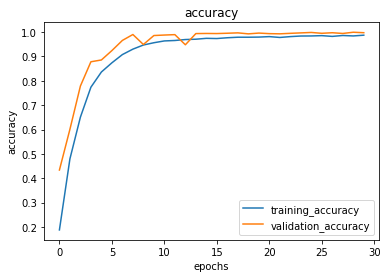

In [10]:
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()


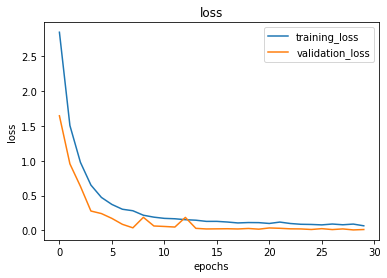

In [11]:
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

In [12]:
test=pd.read_csv('Test.csv')
test_imagePaths=test['Path'].values
y_test=test['ClassId'].values
x_test=[]

for imagePath in test_imagePaths:
    image=load_img(imagePath,target_size=(width,height))
    image=img_to_array(image)
    x_test.append(image)
    
x_test=np.array(x_test)   
x_test=x_test/255
x_test

array([[[[0.4509804 , 0.5411765 , 0.6784314 ],
         [0.45490196, 0.5411765 , 0.6745098 ],
         [0.45490196, 0.5372549 , 0.6627451 ],
         ...,
         [0.3372549 , 0.43137255, 0.5294118 ],
         [0.3137255 , 0.39607844, 0.49411765],
         [0.24705882, 0.32156864, 0.4117647 ]],

        [[0.4627451 , 0.56078434, 0.69803923],
         [0.45490196, 0.54901963, 0.69411767],
         [0.4509804 , 0.5411765 , 0.68235296],
         ...,
         [0.47058824, 0.5568628 , 0.67058825],
         [0.46666667, 0.54509807, 0.654902  ],
         [0.45882353, 0.53333336, 0.6509804 ]],

        [[0.45490196, 0.56078434, 0.69411767],
         [0.44313726, 0.54509807, 0.68235296],
         [0.4509804 , 0.54901963, 0.68235296],
         ...,
         [0.47058824, 0.5529412 , 0.6784314 ],
         [0.46666667, 0.54509807, 0.6627451 ],
         [0.47058824, 0.54509807, 0.67058825]],

        ...,

        [[0.45490196, 0.53333336, 0.654902  ],
         [0.45490196, 0.53333336, 0.64705884]

In [13]:
y_pred=model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

98.37688044338876

In [15]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [16]:
y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)